Importowanie

In [10]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Wczytywanie danych

In [11]:
lfw_people = fetch_lfw_people(min_faces_per_person=50)

X = lfw_people.data
n_features = X.shape[1]
y = lfw_people.target

100 komponenetów

Trening PCA

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA()
X_train_pca = pca.fit_transform(X_train)

pca_100 = PCA(n_components=100)
X_train_pca_100 = pca_100.fit_transform(X_train)
X_test_pca_100 = pca_100.transform(X_test)

Trening MLP (Multilayer Perceptron)

In [13]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train_pca_100 , y_train)
y_pred = clf.predict(X_test_pca_100)

report = classification_report(y_test, y_pred, target_names=lfw_people.target_names)
print(report)

                   precision    recall  f1-score   support

     Ariel Sharon       0.67      0.67      0.67        21
     Colin Powell       0.82      0.78      0.80        74
  Donald Rumsfeld       0.67      0.75      0.71        32
    George W Bush       0.78      0.92      0.84       156
Gerhard Schroeder       0.71      0.52      0.60        33
      Hugo Chavez       0.74      0.65      0.69        26
   Jacques Chirac       0.73      0.42      0.53        19
    Jean Chretien       0.82      0.56      0.67        16
    John Ashcroft       0.58      0.69      0.63        16
Junichiro Koizumi       1.00      0.83      0.91        12
  Serena Williams       0.87      0.81      0.84        16
       Tony Blair       0.73      0.68      0.70        47

         accuracy                           0.76       468
        macro avg       0.76      0.69      0.72       468
     weighted avg       0.76      0.76      0.76       468



Trening SVC

In [14]:
from sklearn.svm  import SVC

svc = SVC(random_state=42)
svc.fit(X_train_pca_100, y_train)
y_pred = svc.predict(X_test_pca_100)

report = classification_report(y_test, y_pred, target_names=lfw_people.target_names)
print(report)

                   precision    recall  f1-score   support

     Ariel Sharon       0.78      0.33      0.47        21
     Colin Powell       0.77      0.77      0.77        74
  Donald Rumsfeld       0.71      0.47      0.57        32
    George W Bush       0.59      0.96      0.73       156
Gerhard Schroeder       0.69      0.33      0.45        33
      Hugo Chavez       0.82      0.35      0.49        26
   Jacques Chirac       1.00      0.05      0.10        19
    Jean Chretien       0.86      0.38      0.52        16
    John Ashcroft       1.00      0.19      0.32        16
Junichiro Koizumi       1.00      0.75      0.86        12
  Serena Williams       0.63      0.75      0.69        16
       Tony Blair       0.65      0.60      0.62        47

         accuracy                           0.66       468
        macro avg       0.79      0.49      0.55       468
     weighted avg       0.71      0.66      0.62       468



50 komponentów


Trening PCA

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA()
X_train_pca = pca.fit_transform(X_train)

pca_50 = PCA(n_components=50)
X_train_pca_50 = pca_50.fit_transform(X_train)
X_test_pca_50 = pca_50.transform(X_test)

Trening MLP

In [16]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train_pca_50 , y_train)
y_pred = clf.predict(X_test_pca_50)

report = classification_report(y_test, y_pred, target_names=lfw_people.target_names)
print(report)

report = classification_report(y_test, y_pred, target_names=lfw_people.target_names)
print(report)

                   precision    recall  f1-score   support

     Ariel Sharon       0.73      0.64      0.68        25
     Colin Powell       0.84      0.78      0.81        63
  Donald Rumsfeld       0.53      0.61      0.57        31
    George W Bush       0.84      0.89      0.86       161
Gerhard Schroeder       0.67      0.51      0.58        39
      Hugo Chavez       0.58      0.65      0.61        23
   Jacques Chirac       0.38      0.27      0.32        11
    Jean Chretien       0.65      0.65      0.65        17
    John Ashcroft       0.69      0.45      0.55        20
Junichiro Koizumi       1.00      0.84      0.91        19
  Serena Williams       0.70      0.82      0.76        17
       Tony Blair       0.63      0.76      0.69        42

         accuracy                           0.74       468
        macro avg       0.69      0.66      0.66       468
     weighted avg       0.74      0.74      0.74       468

                   precision    recall  f1-score   su

Trening SVC

In [ ]:
svc = SVC(random_state=42)
svc.fit(X_train_pca_50, y_train)
y_pred = svc.predict(X_test_pca_50)

report = classification_report(y_test, y_pred, target_names=lfw_people.target_names)
print("Report for MLP \n \n", report)

report = classification_report(y_test, y_pred, target_names=lfw_people.target_names)
print("Report for MLP \n \n", report)

Report for MLP 
 
                    precision    recall  f1-score   support

     Ariel Sharon       0.82      0.47      0.60        19
     Colin Powell       0.77      0.78      0.78        82
  Donald Rumsfeld       0.63      0.53      0.58        36
    George W Bush       0.63      0.96      0.76       158
Gerhard Schroeder       0.76      0.45      0.57        29
      Hugo Chavez       0.89      0.44      0.59        18
   Jacques Chirac       1.00      0.12      0.22        16
    Jean Chretien       1.00      0.67      0.80        15
    John Ashcroft       0.00      0.00      0.00        18
Junichiro Koizumi       1.00      0.58      0.73        19
  Serena Williams       1.00      0.76      0.87        17
       Tony Blair       0.58      0.61      0.60        41

         accuracy                           0.69       468
        macro avg       0.76      0.53      0.59       468
     weighted avg       0.71      0.69      0.67       468

Report for MLP 
 
                

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Wykorzystanie stu komponentów umożliwia uzyskanie lepszych średnich wyników.

Tworzenie eigenfaces

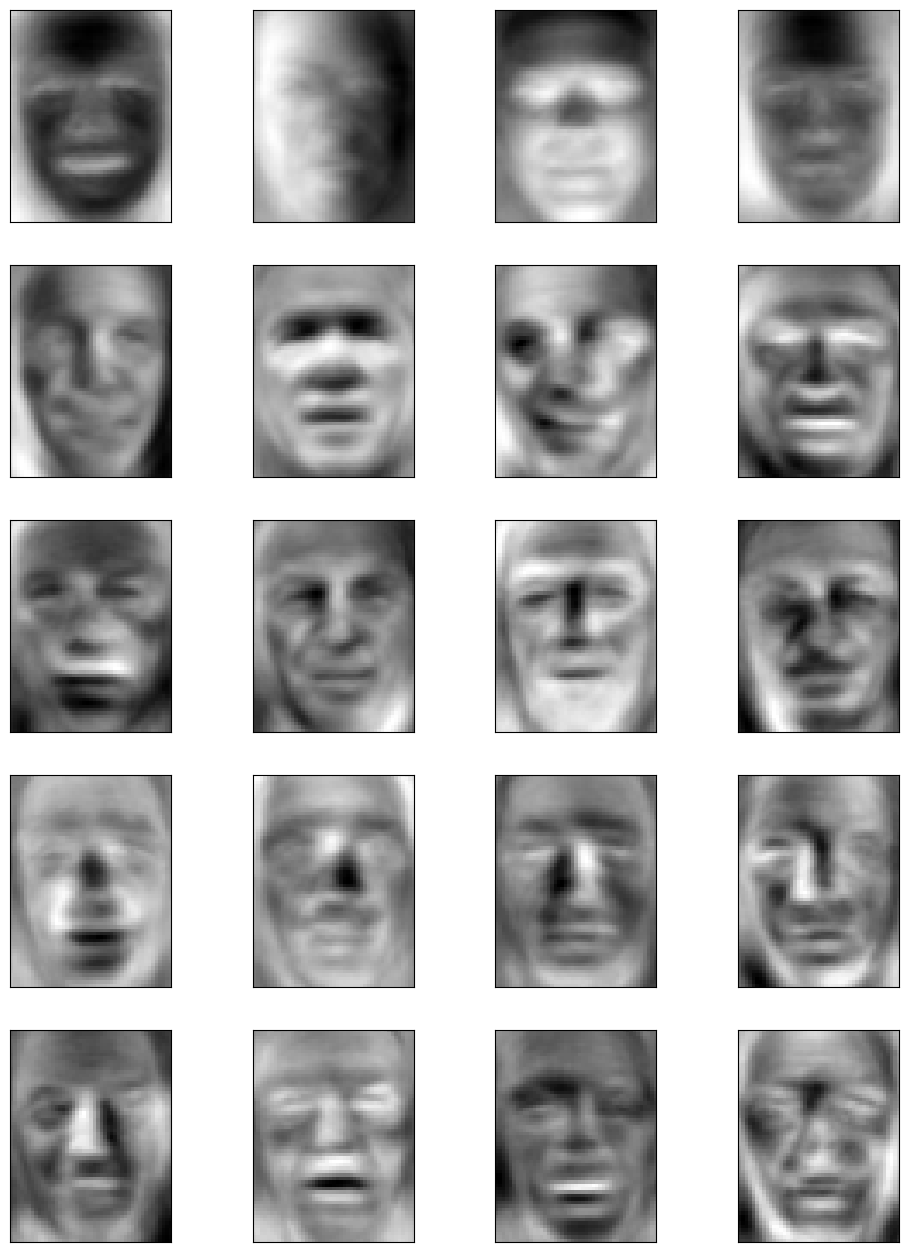

In [ ]:
eigenfaces = pca.components_[:20, :]
eigenfaces = (eigenfaces - eigenfaces.min()) * 255 / (eigenfaces.max() - eigenfaces.min())

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(12,16))

for i, ax in enumerate(axes.flat):
  ax.imshow(eigenfaces[i, :].reshape(62, 47), cmap='gray')
  ax.set(xticks=[], yticks=[])
plt.show()

Eigenfaces stanowią niskowymiarową reprezentację zbioru danych, na podstawie których można zrekonstruować elementy zbioru.

Eigenfaces ekstrahują przede wszystkim cechy związane z padającym oświetleniem, a następnie cechy umożliwiające identyfikację twarzy, na przykład rozstaw oczu.